<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/DataMining_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime, os, sys
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing, linear_model, metrics, model_selection, decomposition, svm, datasets

In [ ]:
#### store data values in x,y test and train
mnist = datasets.fetch_openml('mnist_784')

In [ ]:
x_pc = EFA_PCA(mnist.data, 650)
x_train_pca, x_test_pca, y_train, y_test = model_selection.train_test_split(x_pc, mnist.target, test_size=0.2)

In [ ]:
EFA_tester(x_train_pca, y_train, x_test_pca, y_test)

Train Delay: 35, Test Delay: 0, Score: 0.917
Train Delay: 746, Test Delay: 241, Score: 0.9645
Train Delay: 410, Test Delay: 0, Score: 0.8994285714285715


In [ ]:
def EFA_PCA(X, components=320):
    x_std = preprocessing.StandardScaler().fit_transform(X)
    if components != 0:
      return decomposition.PCA(n_components=components).fit_transform(x_std)
    return x_std


def EFA_tester(X, Y, XP, YT):    
    # first method : Logistic Regression
    start_11 = datetime.datetime.now()
    logisticRegression = linear_model.LogisticRegression(C=1.25, n_jobs=-1)
    logisticRegression.fit(X, Y)
    start_21 = datetime.datetime.now()
    delay11 = start_21 - start_11
    clf1 = logisticRegression.predict(XP)
    start_31 = datetime.datetime.now()
    delay12 = start_31 - start_21
    score1 = np.sum(YT == clf1) / YT.shape[0]
    print(f'Train Delay: {delay11.seconds}, Test Delay: {delay12.seconds}, Score: {score1}')

    # Second method : SVM
    start_21 = datetime.datetime.now()
    svm_clf = svm.SVC()
    svm_clf.fit(X, Y)
    start_22 = datetime.datetime.now()
    delay21 = start_22 - start_21
    clf2 = svm_clf.predict(XP)
    start_23 = datetime.datetime.now()
    delay22 = start_23 - start_22
    score2 = np.sum(YT == clf2) / YT.shape[0]
    print(f'Train Delay: {delay21.seconds}, Test Delay: {delay22.seconds}, Score: {score2}')


    #  third metohd : Stochastic Gradient Descent
    start_31 = datetime.datetime.now()
    sgd = linear_model.SGDClassifier()
    sgd.fit(X, Y)
    start_32 = datetime.datetime.now()
    delay31 = start_32 - start_31
    clf3 = sgd.predict(XP)
    start_33 = datetime.datetime.now()
    delay32 = start_33 - start_32
    score3 = np.sum(YT == clf3) / YT.shape[0]
    print(f'Train Delay: {delay31.seconds}, Test Delay: {delay32.seconds}, Score: {score3}')


In [ ]:
## first way: normal way
def standardization(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

x_s = standardization(mnist.data)
x_std = np.nan_to_num(x_s)

## second way: using sklearn
# x_std = preprocessing.StandardScaler().fit_transform(mnist.data)
x_train_std, x_test_std, y_train, y_test = model_selection.train_test_split(x_std, mnist.target, test_size=0.2)
# x_train_std, x_test_std, y_train, y_test = model_selection.train_test_split(mnist.data, mnist.target, test_size=0.2)

In [ ]:
def pcaMaker(k, x_std):
  x_meaned = x_std - np.mean(x_std, axis=0)
  cov_mat = x_meaned.T.dot(x_meaned) / (x_std.shape[0] - 1)
  # cov_mat = np.cov(x_meaned, rowvar = False)  
  eigen_values, eigen_vectors = np.linalg.eig(cov_mat.T)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:k]
  X_reduced = eigenvector_subset.T.dot( x_meaned.T).T   
  return X_reduced

In [ ]:
## first way: without library
x_train_pca = pcaMaker(320, x_train_std)
x_test_pca = np.float64(pcaMaker(320, x_test_std))


## second way: with sklearn.decomposiotion.PCA()
# {'auto', 'full', 'arpack', 'randomized'}
pca = decomposition.PCA(n_components=320)
pca.fit(x_train_std)
# x_train_pca = pca.transform(x_train_std)
# x_test_pca = pca.transform(x_test_std)

<module 'scipy.misc' from '/usr/local/lib/python3.7/dist-packages/scipy/misc/__init__.py'>

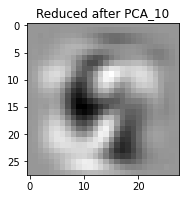

In [ ]:
num, n= 2000, 10
x_std = preprocessing.StandardScaler().fit_transform(mnist.data)
pca = decomposition.PCA(n_components=n)
x = pca.fit_transform(x_std)
sample2 = pca.inverse_transform(x[num])
sample2.shape = (28, 28)
b = plt.subplot(1, 2, 1)
b.set_title(f'Reduced after PCA_{n}')
plt.imshow(sample2, cmap=plt.cm.gray_r)
matplotlib.image.imsave(f'PCA_{n}.jpeg', sample2, cmap=plt.cm.gray_r)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


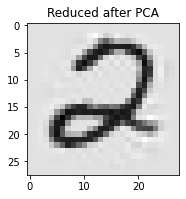

In [ ]:
#### This code shows difference between data's images, before and after pca
num = 2000

sample1 = x_train_std[num]
sample1.shape = (28, 28)
a = plt.subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(sample1, cmap=plt.cm.gray_r)
# This is the result of what I was trying to get in above codes

sample2 = pca.inverse_transform(x_train_pca[num])
# sample2 = x_train_pca[num]
sample2.shape=(28, 28)
b = plt.subplot(1, 2, 1)
b.set_title('Reduced after PCA')
plt.imshow(sample2, cmap=plt.cm.gray_r)

In [ ]:
# this part is only made to estimate the difference of training delay on OriginalData vs PCAData
logistic = linear_model.LogisticRegression(C=1.1, n_jobs=-1)

start = datetime.datetime.now()
logistic.fit(x_train_pca, y_train)
delay1=datetime.datetime.now() - start

start2 = datetime.datetime.now()
logistic.fit(x_train_std, y_train)
delay2=datetime.datetime.now() - start2

print('Original Data Classification Delay: ', delay2.seconds)
print('PCA Data Classification Delay: ', delay1.seconds)

Original Data Classification Delay:  38
PCA Data Classification Delay:  18


In [ ]:
# first method : Logistic Regression
logisticRegression = linear_model.LogisticRegression(C=1.25, n_jobs=-1)
logisticRegression.fit(x_train_pca, y_train)
clf1 = logisticRegression.predict(x_test_pca)

In [ ]:
# Second method : SVM
svm_clf = svm.SVC()
svm_clf.fit(x_train_pca, y_train)
clf2 = svm_clf.predict(x_test_pca)

In [ ]:
#  third metohd : Stochastic Gradient Descent
sgd = linear_model.SGDClassifier()
sgd.fit(x_train_pca, y_train)
clf3 = sgd.predict(x_test_pca)

In [ ]:
# In here we estimate how much our algorithm is correct
score = np.sum(y_test == clf3) / y_test.shape[0]
score

0.23364285714285715

In [ ]:
# This method gives details about the classification
metrics.classification_report(y_test, clf3)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1366\n           1       0.00      0.00      0.00      1572\n           2       0.30      0.41      0.35      1377\n           3       0.36      0.32      0.34      1471\n           4       0.31      0.10      0.15      1390\n           5       0.30      0.25      0.27      1224\n           6       0.85      0.65      0.74      1419\n           7       0.08      0.05      0.06      1444\n           8       0.14      0.52      0.21      1358\n           9       0.09      0.06      0.07      1379\n\n    accuracy                           0.23     14000\n   macro avg       0.24      0.24      0.22     14000\nweighted avg       0.24      0.23      0.22     14000\n'